# Canonical Signals

In [1]:
from PlantReactivityAnalysis.data.signal_dataset import SignalDataset
from PlantReactivityAnalysis.features.features_dataset import FeaturesDataset
import PlantReactivityAnalysis.data.preparation_eurythmy_data as ped
from PlantReactivityAnalysis.visualization.visualize import plot_multiple_waveforms
from PlantReactivityAnalysis.config import FIGURES_DIR, FEATURES_LETTERS_DIR, INTERIM_DATA_DIR, FEATURES_ONE_SEC_DIR

In [2]:
def get_class_indices(input_list):
    class_indices = {}
    for idx, value in enumerate(input_list):
        if value not in class_indices:
            class_indices[value] = []
        class_indices[value].append(idx)
    return class_indices

# Letters

## Data Import

In [3]:
norm_letters_signal_dataset_path= INTERIM_DATA_DIR / "norm_letters_signal_dataset.pkl"
signal_dataset= SignalDataset.load(norm_letters_signal_dataset_path)

feat_path= FEATURES_LETTERS_DIR / "features_dataset_norm_letters_ws1_hl1.pkl"
feat_dataset= FeaturesDataset.load(feat_path)

8878 signals have been loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\interim\norm_letters_signal_dataset.pkl
Dataset loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\processed\segmented_by_letters\features_dataset_norm_letters_ws1_hl1.pkl. Shape: (8878, 187)


## Get Dataset

In [4]:
rows_drop = feat_dataset.objective_features[
            (feat_dataset.objective_features["flatness_ratio_1000"] > 0.75)
            & (feat_dataset.objective_features["flatness_ratio_500"] > 0.85)
            & (feat_dataset.objective_features["flatness_ratio_100"] > 0.999)
        ].index.to_list()

signal_dataset.remove_signals_by_index(rows_drop)

In [5]:
avg= signal_dataset.calculate_average_duration()
print(avg)

11.143667515628618


In [6]:
signal_dataset.resample_signals(target_duration= int(avg))

## Plant Signal

In [7]:
avg_signal= signal_dataset.average_signal(indexes= signal_dataset.features.index.tolist())

Figure saved to C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\reports\figures\signal_avg.png


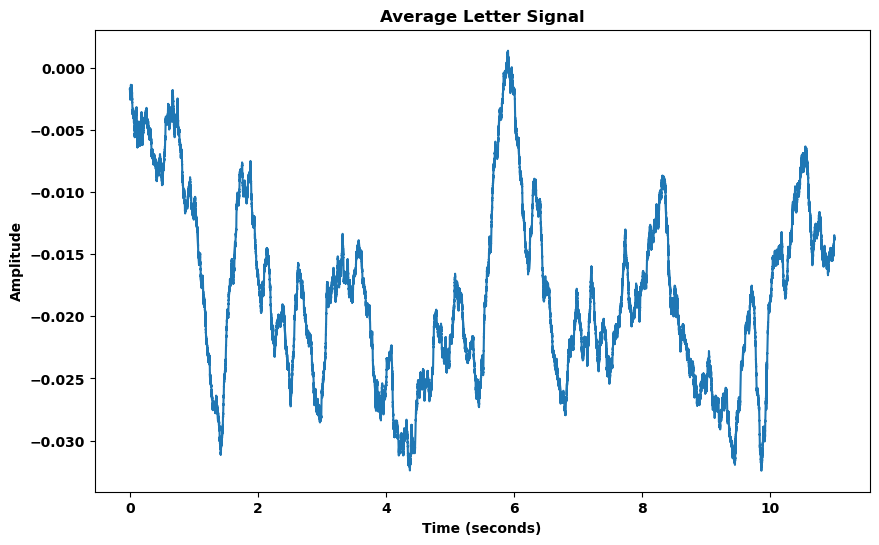

<Figure size 640x480 with 0 Axes>

In [8]:
plot_multiple_waveforms(waveforms= [avg_signal], labels=['Average Plant Signal'], title="Average Letter Signal",
                        save_path=FIGURES_DIR / "signal_avg.png", show_legend=False, figsize=(10, 6))

## RQ1

In [9]:
rq1_signal_dataset= signal_dataset.copy()
rq1_indexes, rq1_targets= ped.get_indexes_and_targets_by_rq(1, rq1_signal_dataset.features)
rq1_signal_dataset.features= rq1_signal_dataset.features.iloc[rq1_indexes]
rq1_signal_dataset.features.reset_index(drop=True, inplace=True)

In [10]:
rq1_classes_indices= get_class_indices(rq1_targets)

In [11]:
avg_eurythmy= signal_dataset.average_signal(rq1_classes_indices[1])
avg_control= signal_dataset.average_signal(rq1_classes_indices[0])

Figure saved to C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\reports\figures\rq1_signal_comparison.png


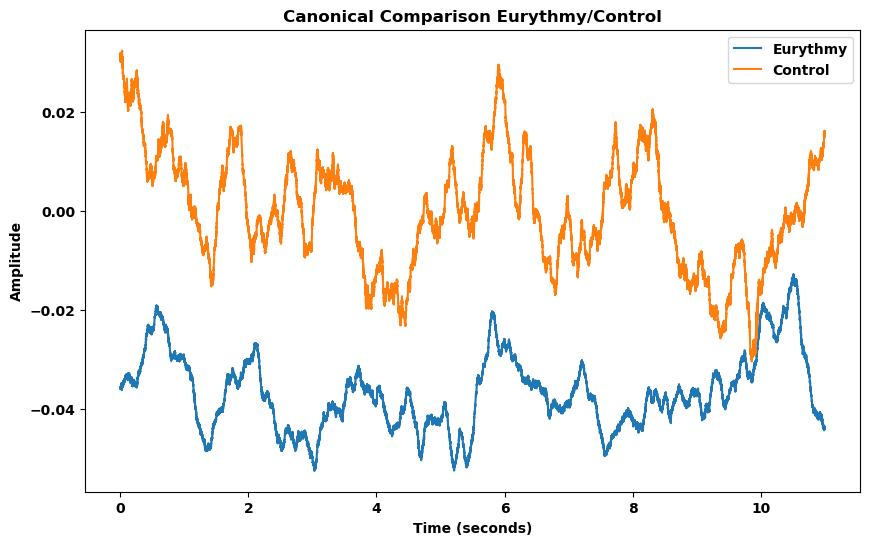

<Figure size 640x480 with 0 Axes>

In [12]:
plot_multiple_waveforms(waveforms= [avg_eurythmy, avg_control], labels=['Eurythmy','Control'], title='Canonical Comparison Eurythmy/Control',
                        save_path=FIGURES_DIR / "rq1_signal_comparison.png", figsize=(10, 6))

## RQ2

Figure saved to C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\reports\figures\rq2_signal_comparison.png


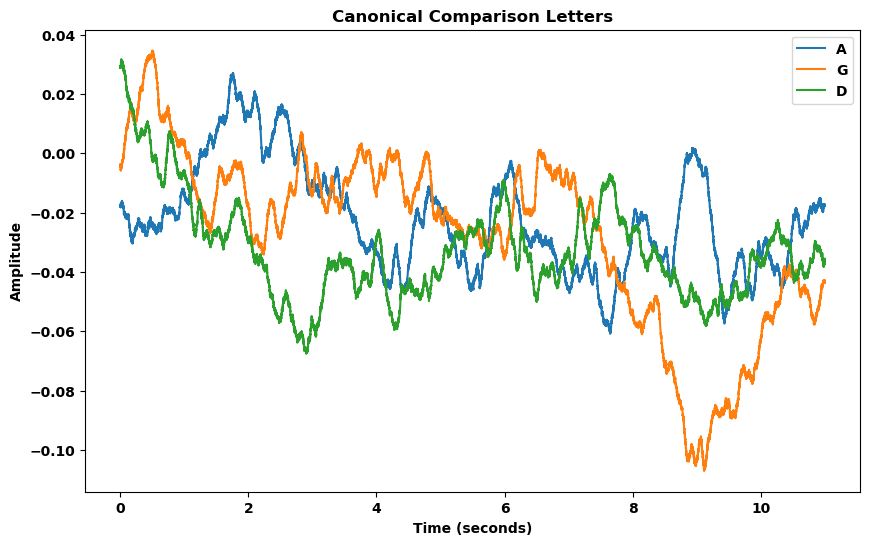

<Figure size 640x480 with 0 Axes>

In [13]:
rq2_signal_dataset= signal_dataset.copy()
rq2_indexes, rq2_targets= ped.get_indexes_and_targets_by_rq(2, rq2_signal_dataset.features)
rq2_signal_dataset.features= rq2_signal_dataset.features.iloc[rq2_indexes]
rq2_signal_dataset.features.reset_index(drop=True, inplace=True)

rq2_classes_indices= get_class_indices(rq2_targets)
avg_A= signal_dataset.average_signal(rq2_classes_indices[0])
avg_G= signal_dataset.average_signal(rq2_classes_indices[1])
avg_D= signal_dataset.average_signal(rq2_classes_indices[2])

plot_multiple_waveforms(waveforms= [avg_A, avg_G, avg_D], labels=['A','G','D'],
                        title='Canonical Comparison Letters', save_path=FIGURES_DIR / "rq2_signal_comparison.png")

# One Second

## Data Import

In [3]:
norm_1s_signal_dataset_path = INTERIM_DATA_DIR / "norm_1s_signal_dataset.pkl"
signal_dataset = SignalDataset.load(file_path= norm_1s_signal_dataset_path)

feat_path= FEATURES_ONE_SEC_DIR / "features_dataset_norm_1s_ws0.1_hl0.1.pkl"
feat_dataset= FeaturesDataset.load(feat_path)

148682 signals have been loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\interim\norm_1s_signal_dataset.pkl
Dataset loaded from C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\data\processed\segmented_by_one_second\features_dataset_norm_1s_ws0.1_hl0.1.pkl. Shape: (148682, 188)


## Get Dataset

In [4]:
rows_drop = feat_dataset.objective_features[
            (feat_dataset.objective_features["flatness_ratio_1000"] > 0.75)
            & (feat_dataset.objective_features["flatness_ratio_500"] > 0.85)
            & (feat_dataset.objective_features["flatness_ratio_100"] > 0.999)
        ].index.to_list()

signal_dataset.remove_signals_by_index(rows_drop)

## Plant Signal

In [16]:
avg_signal= signal_dataset.average_signal(signal_dataset.features.index.tolist())

Figure saved to C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\reports\figures\signal_avg.png


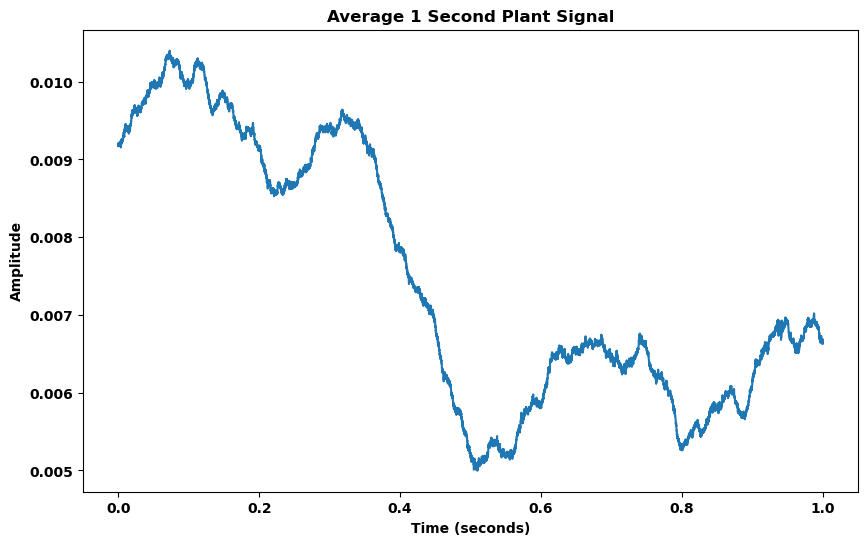

<Figure size 640x480 with 0 Axes>

In [17]:
plot_multiple_waveforms(waveforms= [avg_signal], title='Average 1 Second Plant Signal',
                            save_path = FIGURES_DIR / "signal_avg.png", show_legend=False, figsize=(10, 6))

## RQ5

In [5]:
rq5_signal_dataset= signal_dataset.copy()
rq5_indexes, rq5_targets= ped.get_indexes_and_targets_by_rq(5, rq5_signal_dataset.features)
rq5_signal_dataset.features= rq5_signal_dataset.features.iloc[rq5_indexes]
rq5_signal_dataset.features.reset_index(drop=True, inplace=True)

rq5_classes_indices= get_class_indices(rq5_targets)
avg_1= signal_dataset.average_signal(rq5_classes_indices[0])
avg_2= signal_dataset.average_signal(rq5_classes_indices[1])
avg_3= signal_dataset.average_signal(rq5_classes_indices[2])

C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\src\PlantReactivityAnalysis\data\preparation_eurythmy_data.py:470: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, "plant"] = df["plant"].replace(plant_mapping).astype(int)


Figure saved to C:\Users\alvar\Documents\GitHub\Plant-Reactivity-Analysis\reports\figures\rq5_signal_avg.png


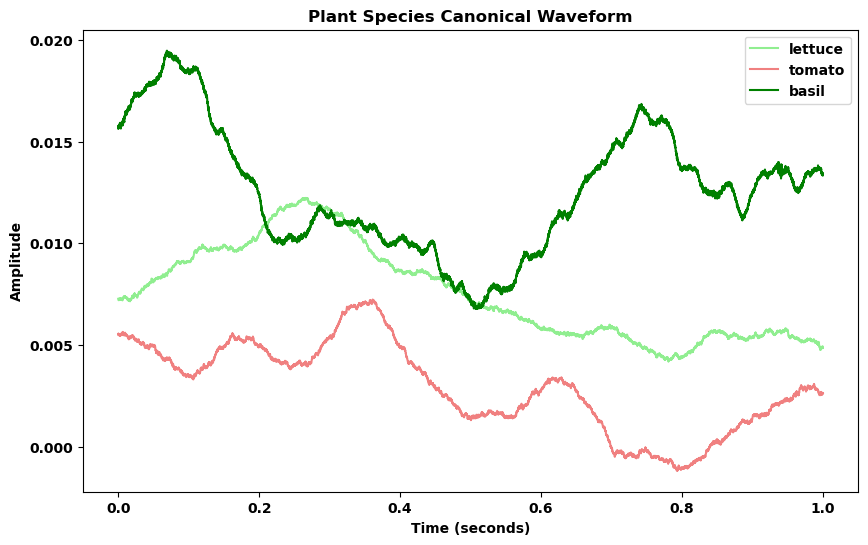

<Figure size 640x480 with 0 Axes>

In [7]:
plot_multiple_waveforms(waveforms= [avg_1, avg_2, avg_3], labels=['lettuce','tomato','basil'], colors=['lightgreen', 'lightcoral','green'],
                        title='Plant Species Canonical Waveform', save_path = FIGURES_DIR / "rq5_signal_avg.png", figsize=(10, 6))